In [165]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import pyplot
from sklearn.preprocessing import power_transform
from scipy import stats

df = pd.read_csv('../data/processed/X_full.csv')

def yeo_johnson(series):
    arr = np.array(series).reshape(-1, 1)
    return power_transform(arr, method='yeo-johnson')

def box_johnson(series):
    arr = np.array(series).reshape(-1, 1)
    return power_transform(arr, method='box-cox')

def stats_boxcox(series):
    arr = np.array(series).reshape(-1, 1)
    posdata = arr[arr > 0]
    bcdata, lam = stats.boxcox(posdata)
    x = np.empty_like(arr)
    x[arr > 0] = bcdata
    x[arr == 0] = -1/la
    return x

# Add 1m55s to round if freezetime
df['round_status_time_left'] = df.apply(add_round_time, axis=1)
df = df.drop(['round_status_FreezeTime', 'round_status_Normal'], axis=1)

# Clip roundtime value
df['round_status_time_left'] = df['round_status_time_left'].clip(00.1, 175)

# Drop map columns
df = df.drop(df.columns[df.columns.str.contains('map')], axis=1)

# Make data more Gaussian-like
cols = ['ct_money', 't_money', 'ct_health',
 't_health', 'ct_armor', 't_armor', 'ct_helmets', 't_helmets',
  'ct_defuse_kits', 'ct_players', 't_players']
for col in cols:
    df[col] = yeo_johnson(df[col])

(array([110572.,      0.,      0.,      0.,      0.,      0.,      0.,
             0.,      0.,  12340.]),
 array([-3.34068091e-01, -1.26657052e-03,  3.31534950e-01,  6.64336471e-01,
         9.97137991e-01,  1.32993951e+00,  1.66274103e+00,  1.99554255e+00,
         2.32834407e+00,  2.66114559e+00,  2.99394711e+00]),
 <a list of 10 Patch objects>)

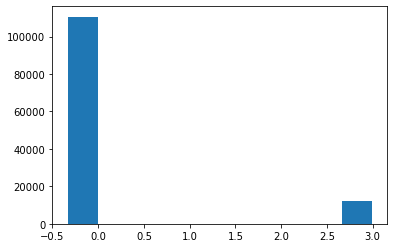

In [169]:
plt.hist(df['ct_weapon_Aug'])